<h1>Histogram and Intensity Transformations</h1>


<h2>Objectives</h2>


Pixel Transforms are operations you perform one pixel at a time. Histograms display the intensity of the image and can be used to optimize image characteristics. Here I will apply Intensity Transformations, making objects easier to see by improving image contrast and brightness. I will use thresholding to segment objects from images in a different notebook.


### Pixel Transforms
>
    Histograms
    Intensity Transformations
    Thresholding and Simple Segmentation


----


This notebook works through with Python 3.8.10

Download the image

In [8]:
# pips needed if not installed: requests, opencv-python-headless, numpy, matplotlib

In [34]:
import os
import requests

# Marked out to prevent duplications - to run notebook unmark and run.

# Create a directory to save the images if it doesn't exist
os.makedirs('images', exist_ok=True)

# URLs of the images
urls = [
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png"
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png"
]

# Corresponding filenames
filenames = [
    "goldhill.bmp",
    "cameraman.jpeg",
    "zelda.png",
    "mammogram.png",
    "baboon.png"
]

# Download and save each image
for url, filename in zip(urls, filenames):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)
        print(f"Downloaded {filename}")

Downloaded baboon.png


Importand used imports


In [6]:
%pip install opencv-python-headless

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---- ----------------------------------- 4.7/38.8 MB 23.8 MB/s eta 0:00:02
   --------- ------------------------------ 8.9/38.8 MB 23.1 MB/s eta 0:00:02
   ------------ --------------------------- 12.1/38.8 MB 19.9 MB/s eta 0:00:02
   --------------- ------------------------ 15.2/38.8 MB 18.7 MB/s eta 0:00:02
   ------------------ --------------------- 18.4/38.8 MB 17.8 MB/s eta 0:00:02
   ---------------------- ----------------- 21.8/38.8 MB 17.4 MB/s eta 0:00:01
   ------------------------- -------------- 24.9/38.8 MB 17.0 MB/s eta 0:00:01
   ---------------------------- ----------- 28.0/38.8 MB 16.8 MB/s eta 0:00:01
   -------------------------------- ------- 31.2/38.8 MB 16.5 MB/s eta 0:00:01
   ----------------------------------- ---- 34.3/38.8 MB 16.4 MB/s eta 0:00:01
   -------------------------------------- - 37.7/38.8 MB 16.2 MB/s eta 0:00:01
   ---------------------------------------- 38.8/38.8 MB 15.7 M

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

First, i'll define a helper function to plot two images side-by-side. This function will be used repeatedly to showcase the results. 


In [9]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

Define another helper function. This will plot two histograms side-by-side.

In [10]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

# Histograms  


A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use 'cv.calcHist()' to generate the histogram. The parameter values below:
<p>
    <code>cv2.calcHist(CV array:<b>[image]</b> this is the image channel:<b>[0]</b>,for now it will be <b>[None]</b>,the number of bins:<b>[L]</b>,the range of index of bins:<b>[0,L-1]</b>) </code>   
</p>

    For real images, L is 256.


## Toy Example


Consider the toy array with intensity values ranging from 0 to 2. We can create a histogram. Its first element is the number of zeros in the image (in this case, 1); its second element is the number of ones in the image (in this case, 5), and so on.


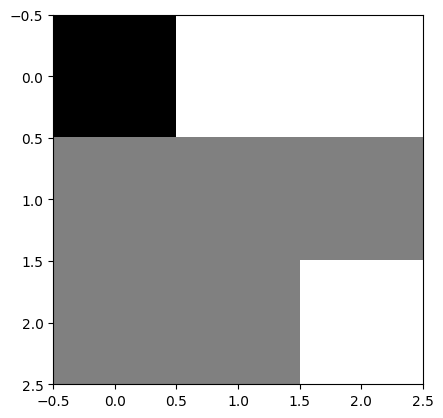

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [11]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

Use the caclHist function, in this case, we use only three bins as there are only three values, and the index of the bins are from 1 to 3.

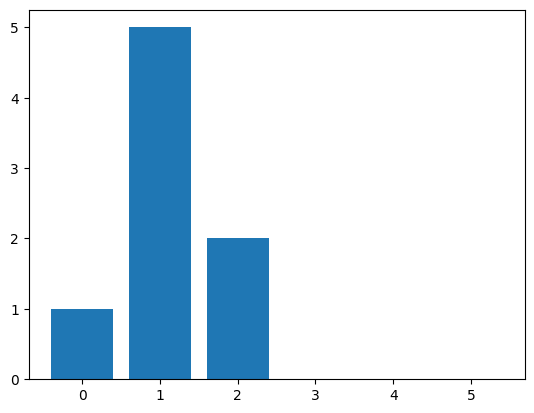

In [12]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

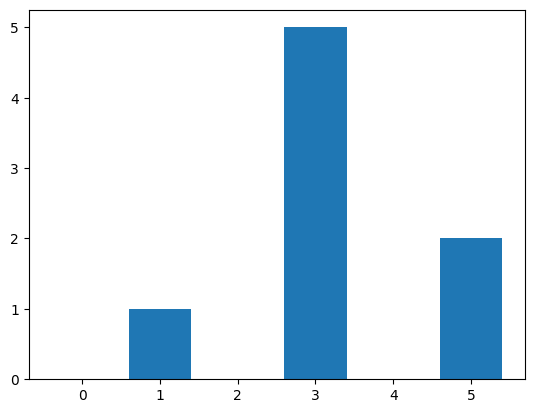

In [13]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

The histogram is a function where $h[r]$  where   $r \in {0,1,2} $. In the above example  $h[0]=1$,$h[1]=5$ and $h[2]=3$


## Gray Scale Histograms 


Histograms are used in grayscale images.  Grayscale images are used in many applications, including medical and industrial. Color images are split into luminance and chrominance. The luminance is the grayscale portion and is usually processed in many applications. Consider the following very old "Gold Hill" image:

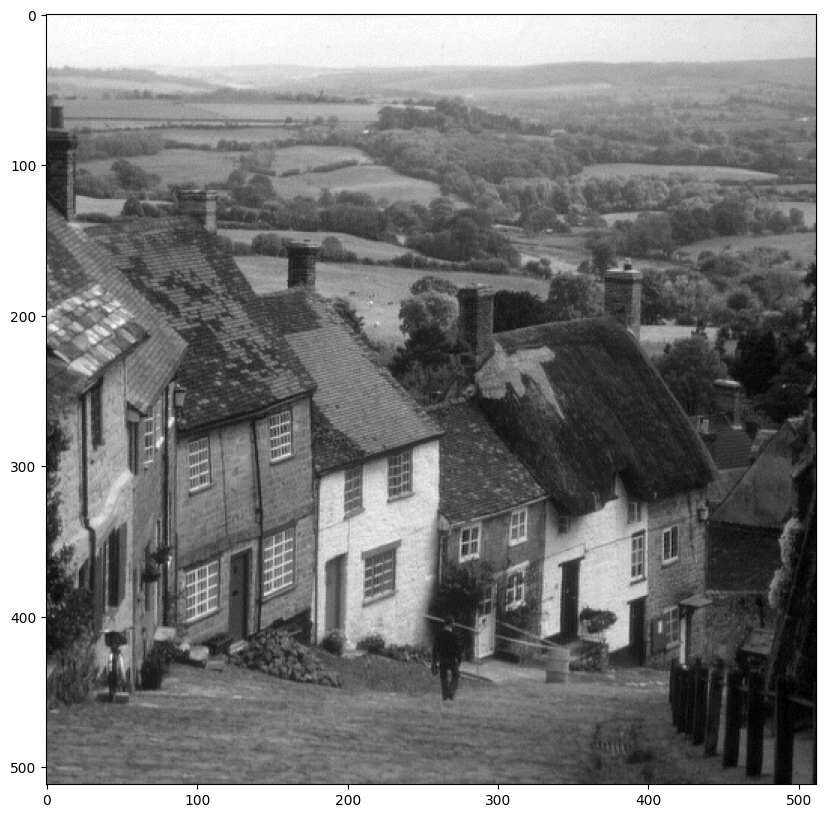

In [14]:
goldhill = cv2.imread("goldhill.bmp",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap="gray")
plt.show()

Calculate the histogram using the `calcHist` function from the `cv2` module as follows, the shape is 256.


In [15]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,256])

Plot it as a bar graph, the x-axis are the pixel intensities and the y-axis is the number of times of occurrences that the corresponding pixel intensity value on x-axis occurred.


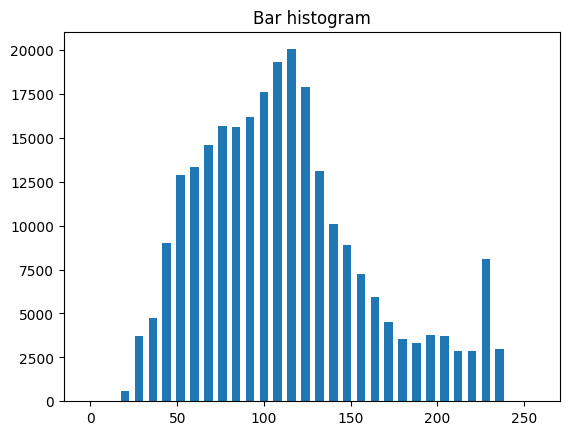

In [16]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

The histogram is a function where $h[r]$  where   $r \in {0,1,..,255} $.


Convert it to a probability mass function by normalizing it by the number of pixels:


In [17]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])

Plot as a continuous function:

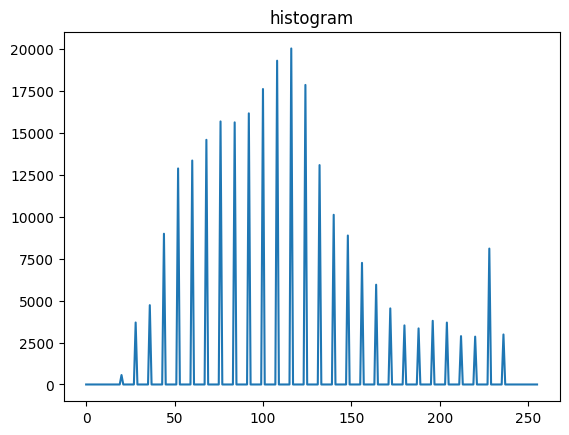

In [18]:
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()

Apply a histogram to each image color channel:

In [43]:
cv_target = cv2.imread("baboon.png")

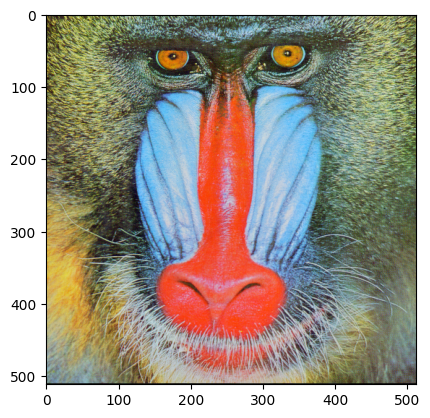

In [44]:
plt.imshow(cv2.cvtColor(cv_target,cv2.COLOR_BGR2RGB))
plt.show()

In the loop, the value for i specifies what color channel calcHist is going to calculate the histogram for.   

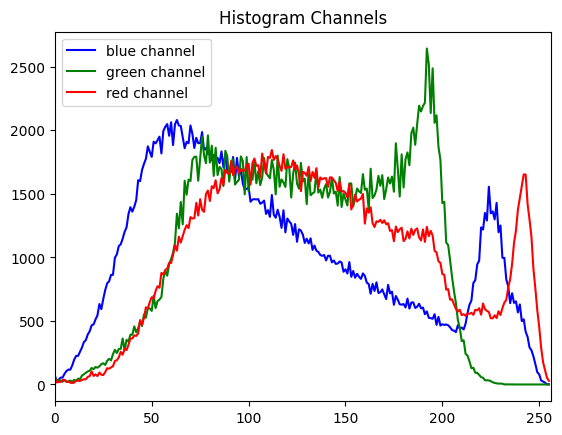

In [45]:
color = ('blue', 'green', 'red')
for i, col in enumerate(color):
    histr = cv2.calcHist([cv_target], [i], None, [256], [0, 256])
    plt.plot(histr, color=col, label=col + " channel")

plt.xlim([0, 256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

#  Intensity Transformations


I think of an image as a function f(x,y) instead of an array at this point, where `x` is the row index and `y` is the column index. You can apply a transformation T to the image and get a new image: 
g(x,y)=T(f(x,y))

An Intensity Transformation depends on only one single point (x,y). For example, you can apply a linear transform g(x,y) = 2f(x,y) + 1; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, referred to as a gray-level mapping. The variable of r is the gray level intensity, similar to the histogram values. The new output s is given by:

$$
s=T(r)
$$

## Image Negatives


Consider image with L intensity values ranging from [0,L-1].  We can reverse the intensity levels by applying the following:
$$
g(x,y)=L-1-f(x,y)
$$

Using the intensity transformation function notation 
$$
s = L - 1 - r
$$

This is called the image negative. For L= 256 the formulas simplifys to:
$$
g(x,y)=255-f(x,y) \qquad \mbox{and} \qquad s=255-r
$$


Perform intensity transformation on the toy image where L = 3:

In [46]:
neg_toy_image = -1 * toy_image + 255

print("toy image\n", neg_toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


Darker intensity’s become brighter and brighter become darker, middle intensity’s remain the same.

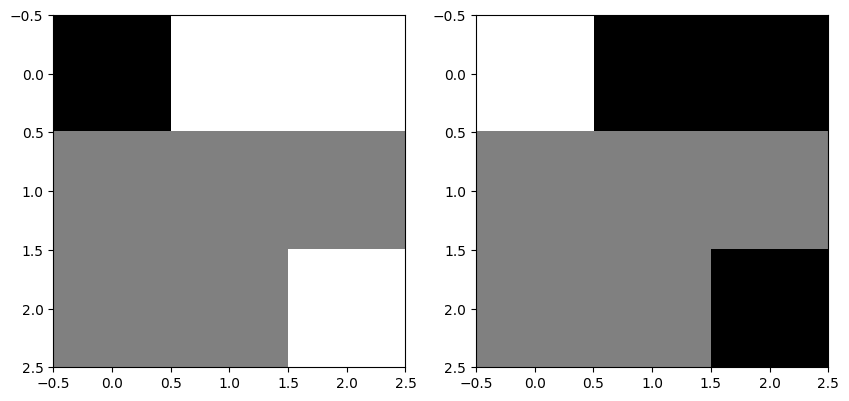

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [47]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()
print("toy_image:",toy_image)

Reversing image intensity has strength in analyzing medical images. Consider the mammogram with micro-calcifications on the upper quadrant:

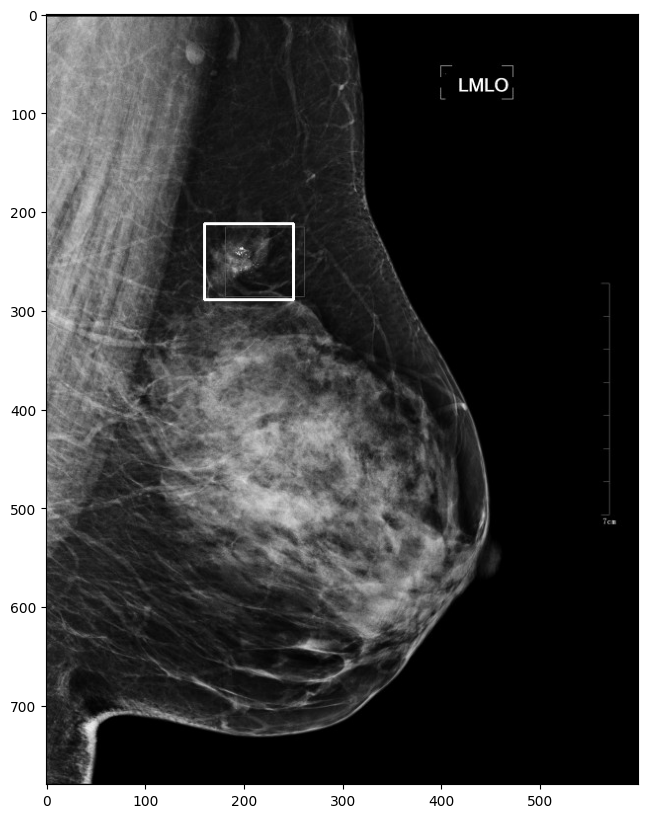

In [48]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2)

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

Apply the intensity transformation:

In [49]:
img_neg = -1 * image + 255

We see the micro-calcifications in the image negatives, which is easier to analyze:


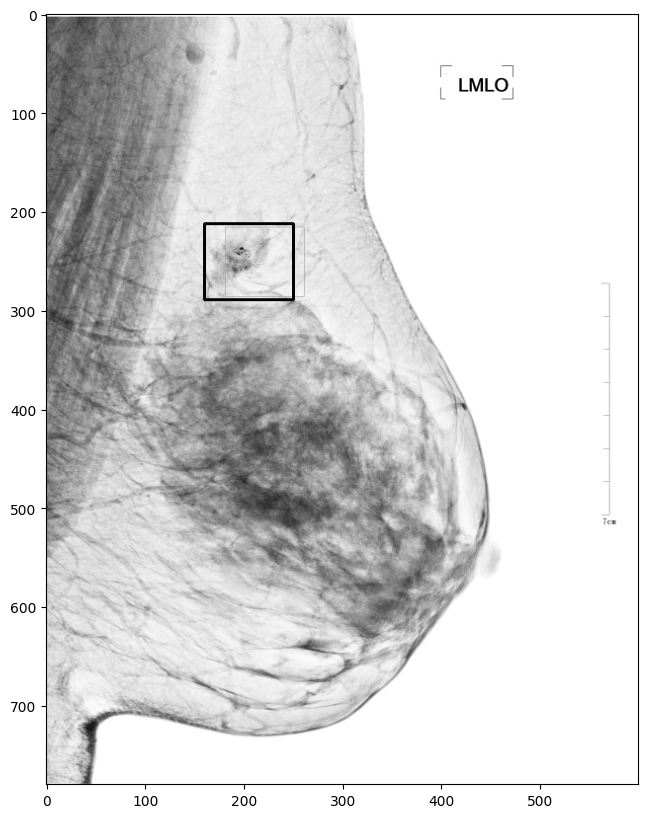

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

## Brightness and contrast adjustments


Use multiplication by $\alpha$ for contrast control and addition by $\beta$ to improve brightness control. This applies the Intensity Transformation as well. The image is f(x,y) and the transformed image is g(x,y), where g(x,y) =$\alpha$  f(x,y) + $\beta$.


 Rather than implementing via array operations, use the function  `convertScaleAbs`. It scales, calculates absolute values, and converts the result to 8-bit so the values fall between [0,255]. For brightness control, we can set $\alpha$ to 1 and $\beta$ to 100: Apply this to the Good Hill image, it’s dark and hazy so let's see if we can improve it. 


In [51]:
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

Plot the brighter image


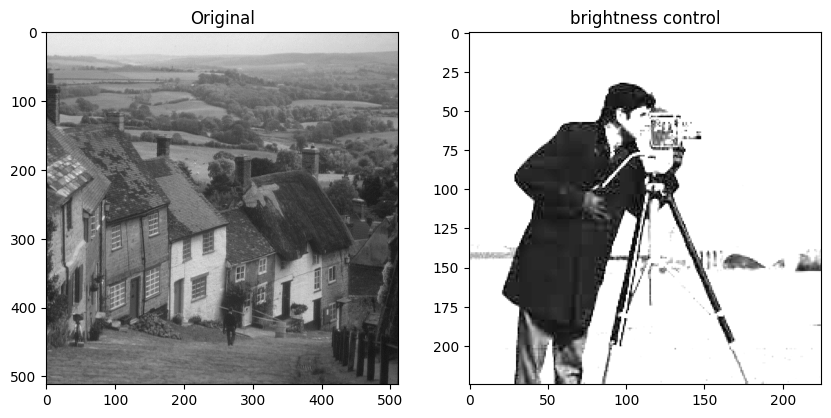

In [102]:
plot_image(goldhill, new_image, title_1 = "Original", title_2 = "brightness control")

Check the brighter histogram for the shift


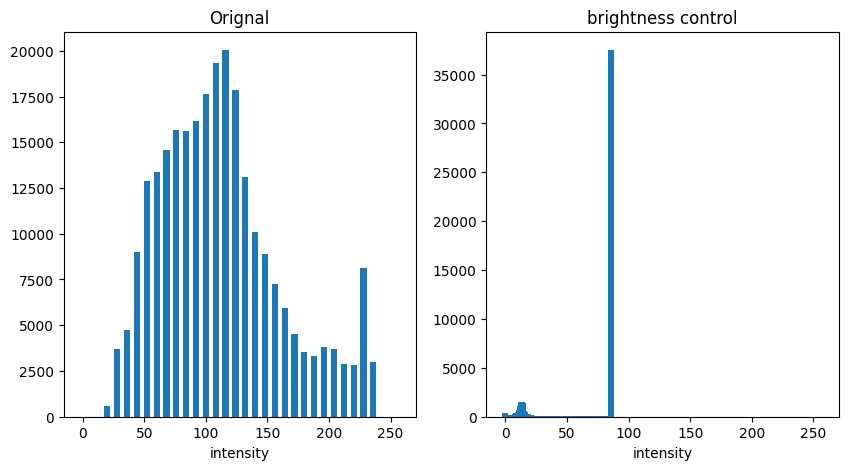

In [78]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

Next, increase the contrast with $\alpha$:


In [79]:
plt.figure(figsize=(10,5))
alpha = 2 # Simple contrast control
beta = 0 # Simple brightness control 
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

Compare the images & histograms:

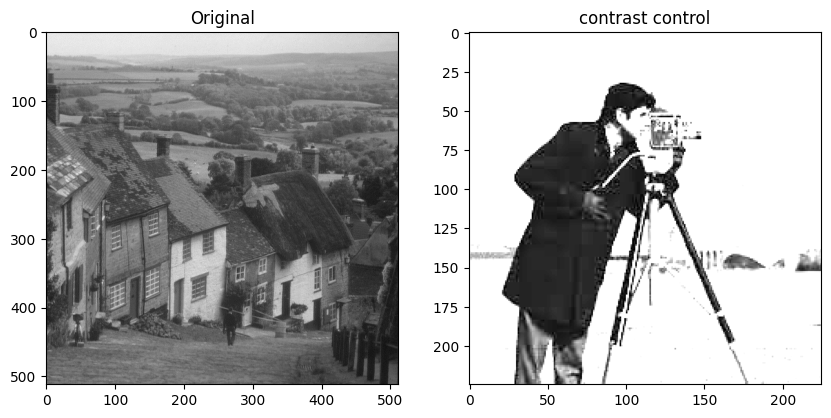

In [103]:
plot_image(goldhill,new_image,"Original","contrast control")

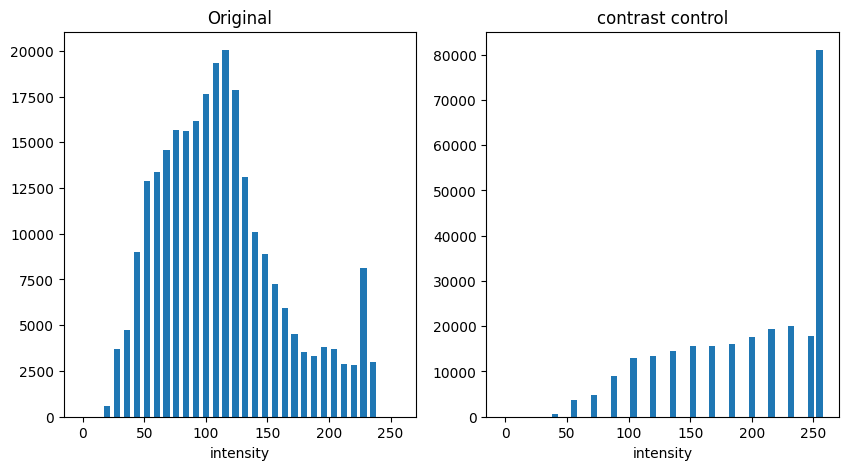

In [81]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image,"Original","contrast control")

It's too bright so I will adapt the brightness by making the image darker and increasing the contrast.

In [82]:
plt.figure(figsize=(10,5))
alpha = 3 # Contrast control
beta = -200  # Brightness control
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

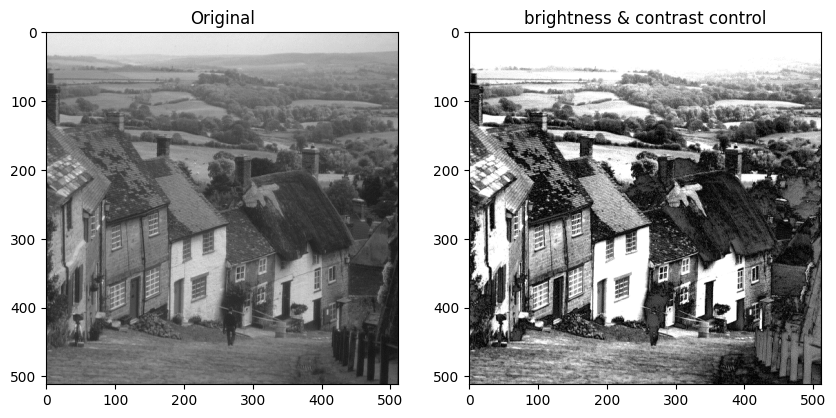

In [83]:
plot_image(goldhill, new_image, "Original", "brightness & contrast control")

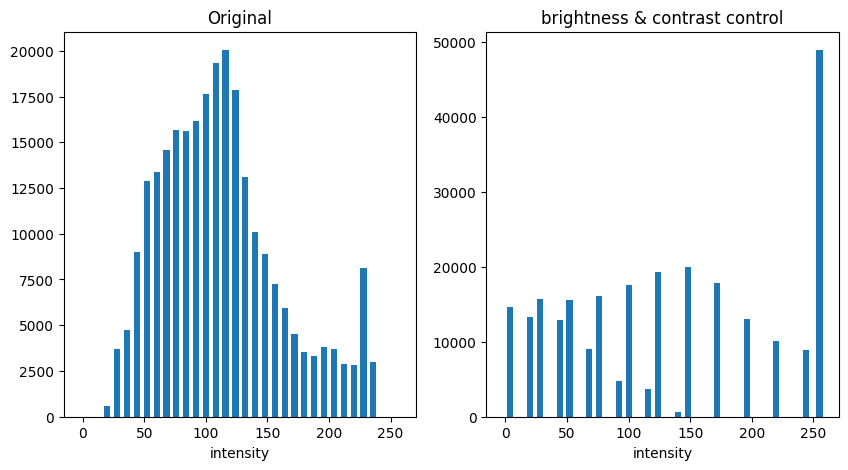

In [84]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Original", "brightness & contrast control")

There are other nonlinear methods to improve contrast and brightness with different sets of parameters. In general, it’s difficult to manually adjust the contrast and brightness parameter, but there are algorithms that improve contrast automatically.


## Histogram Equalization


Histogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels; It does this by flatting  the histogram. We simply apply the function `cv2.equalizeHist`.

In [85]:
zelda = cv2.imread("zelda.png",cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)

Compare the image before and after the Histogram Equalization.
I think the contrast is improved.

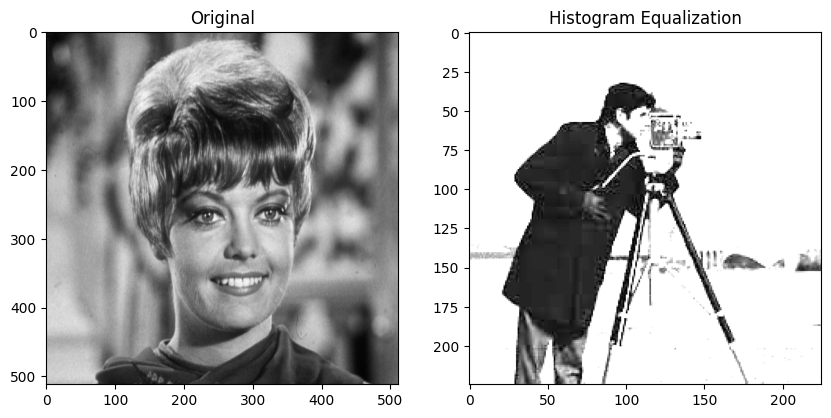

In [104]:
plot_image(zelda,new_image,"Original","Histogram Equalization")

Comparing the Histogram Equalizations, the histogram is spread out:

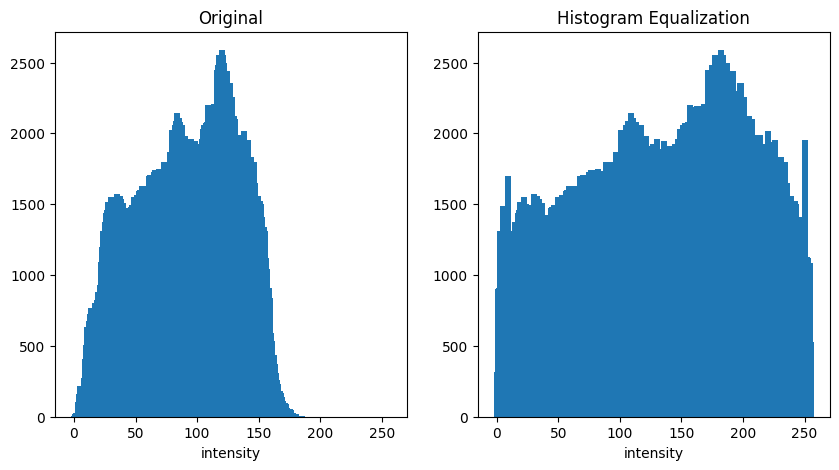

In [87]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image,"Original","Histogram Equalization")

## Thresholding and Simple Segmentation 


Thresholding is used in image segmentation this means extracting objects from an image. Image segmentation is used in many applications including extracting text, medical imaging, and industrial imaging.
Thresholding an image takes a threshold; If a particular pixel (i,j) is greater than that threshold it will set that pixel to some value usually 1 or 255, otherwise, it will set it to another value, usually zero. We can write a Python function that will perform thresholding and output a new image given some input grayscale image:

In [88]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)

    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value

    return image_out

Consider the following toy image:


In [89]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

Apply thresholding, by setting all the values less than two to zero. 

In [90]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

Compare the two images to verify all the gray values are now black:

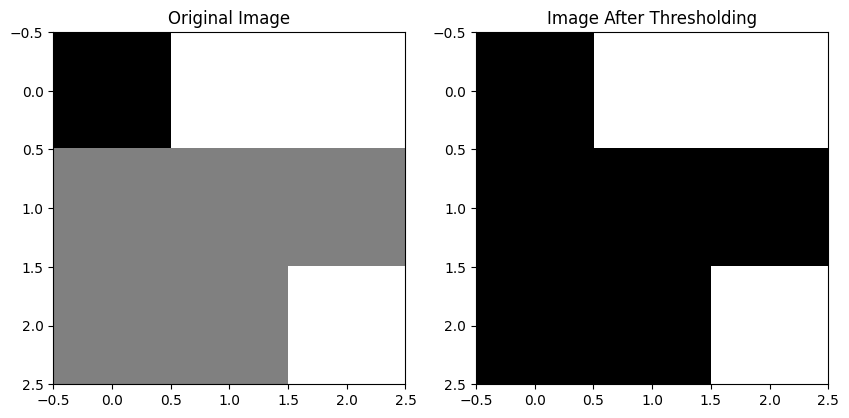

In [91]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

Consider the cameraman image:


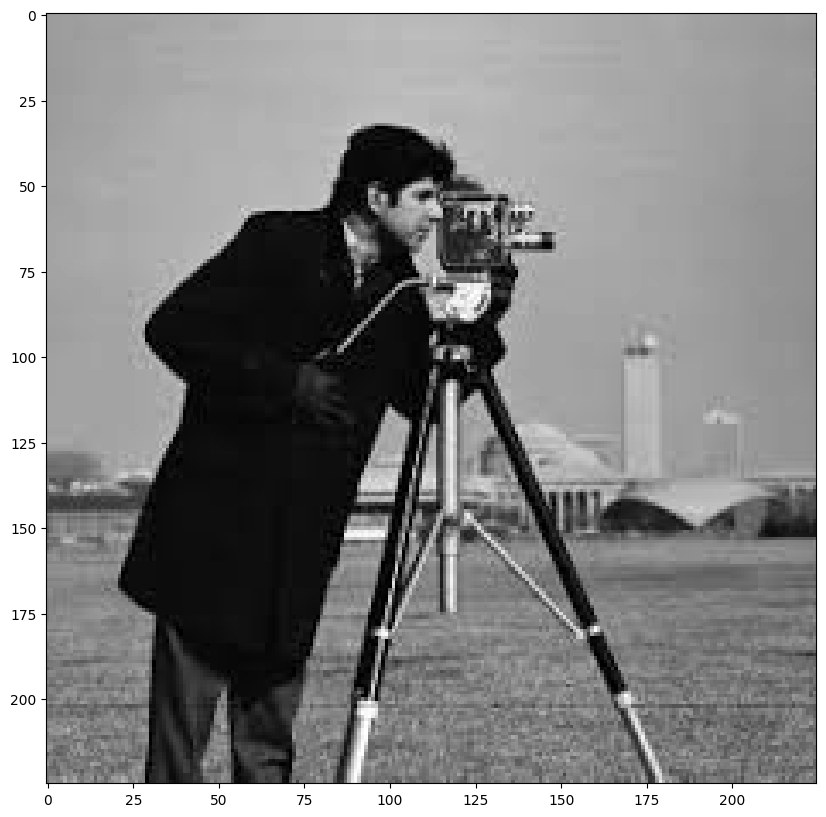

In [92]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

We can see the histogram as two peeks, this means that there is a large proportion of pixels in those two ranges:

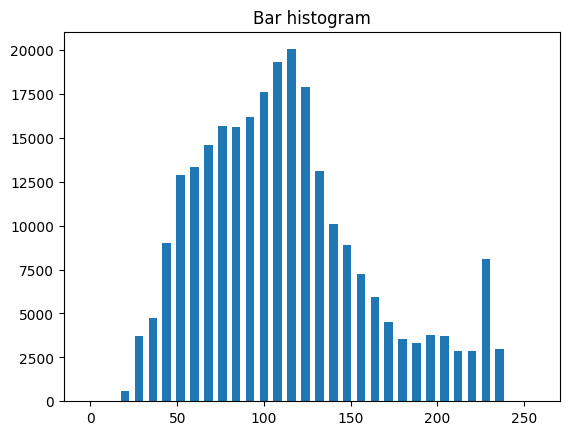

In [93]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

The cameraman corresponds to the darker pixels, therefore we can set the Threshold in such a way as to segment the cameraman. In this case, it looks to be slightly less than 90, let’s give it a try:

In [94]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

The pixels corresponding to the cameraman are now zero and the rest are set to 255:


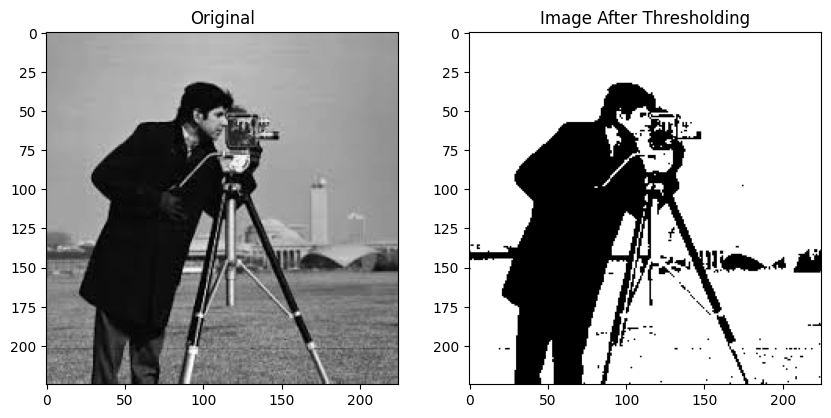

In [95]:
plot_image(image, new_image, "Original", "Image After Thresholding")

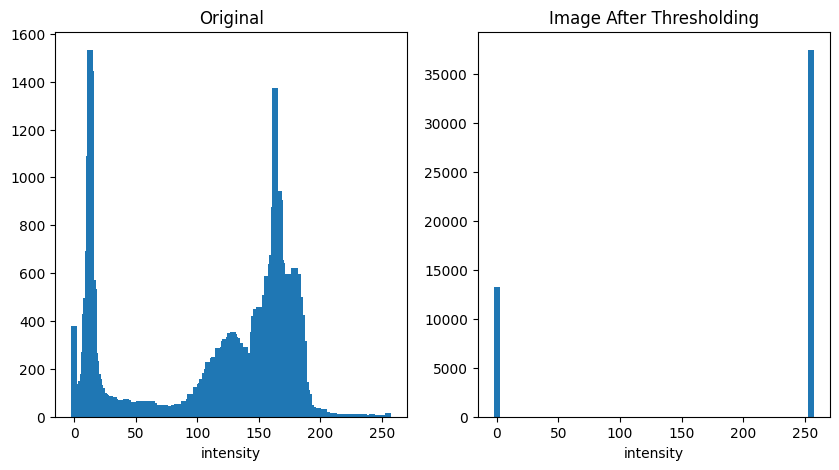

In [96]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Original", "Image After Thresholding")

The function `cv.threshold` Applies a threshold to the gray image, with the following parameters:
>
    cv.threshold(grayscale image, threshold value, maximum value to use, thresholding type)

Use parameter thresholding type, use basic thresholding: `cv2.THRESH_BINARY` this is the type we implemented in the function `thresholding`, it just a number:


In [97]:
cv2.THRESH_BINARY

0

Apply thresholding to the image as follows:

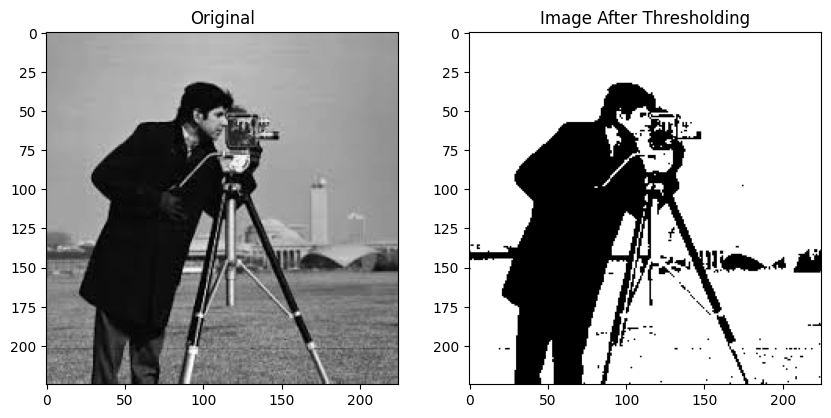

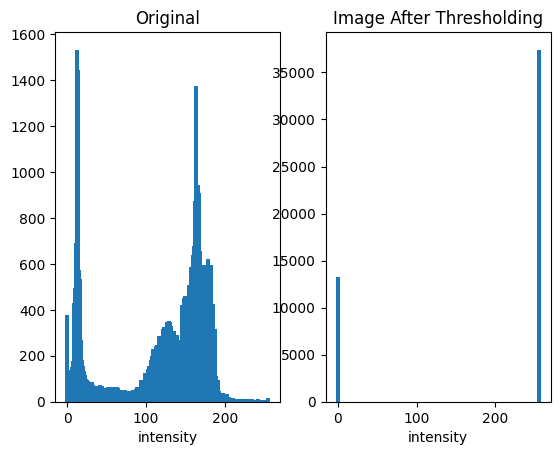

In [105]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Original","Image After Thresholding")
plot_hist(image, new_image,"Original","Image After Thresholding")

`ret` is the threshold value and `new_image` is the image after thresholding has been applied. There are different threshold types, for example, `cv2.THRESH_TRUNC` will not change the values if the pixels are less than the threshold value:

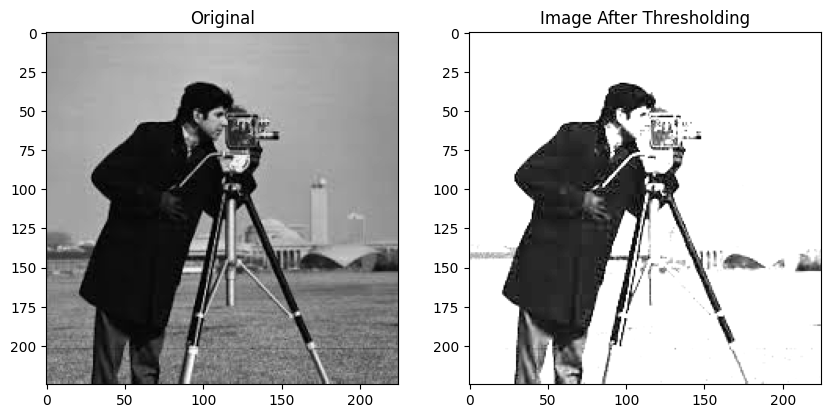

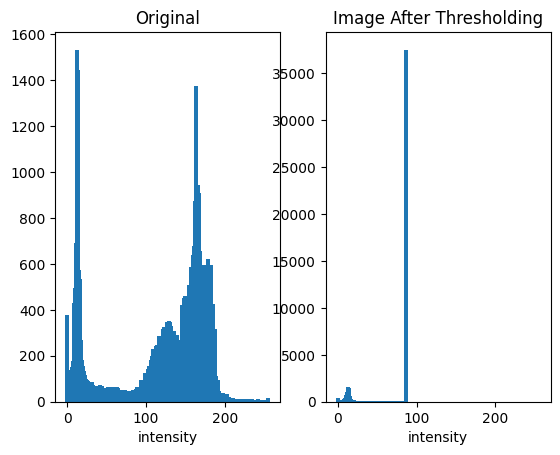

In [106]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Original","Image After Thresholding")
plot_hist(image, new_image,"Original","Image After Thresholding")

The darker elements have not changed and the lighter values are set to 255.

 Otsu's method <code>cv2.THRESH_OTSU</code> avoids having to choose a value and determines it automatically, using the histogram.


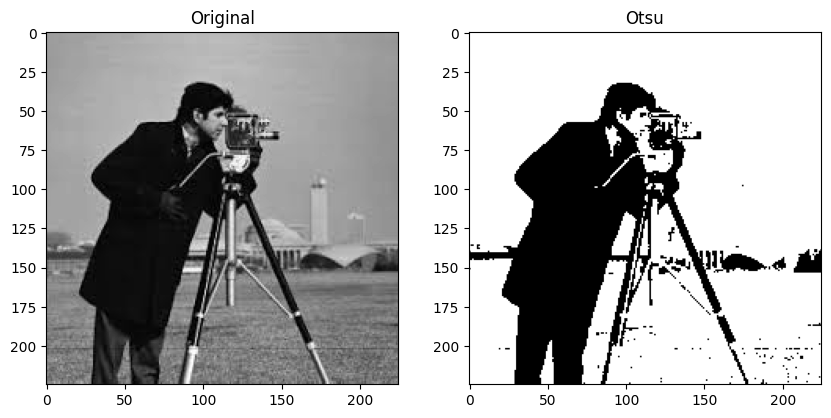

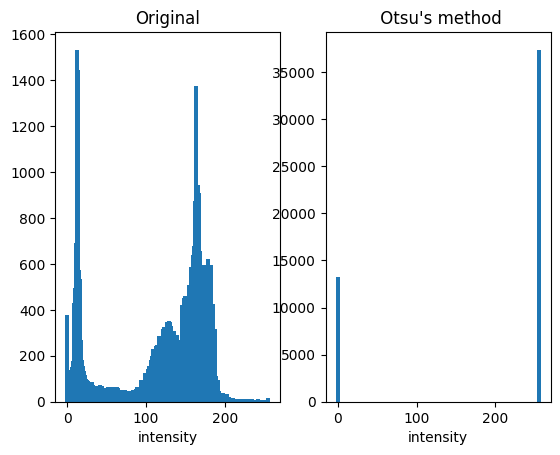

In [107]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Original","Otsu")
plot_hist(image, otsu,"Original"," Otsu's method")

We assign the first row of pixels of the original array to the new array's last row. We repeat the process for every row, incrementing the row number for the original array and decreasing the new array's row index assigning the pixels accordingly.


In [101]:
ret

88.0

<h2>Authors</h2>


 [William Ruffu]( https://www.linkedin.com/in/williamruffu/):  Certified AI Engineer


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.
